In [1]:
from pathlib import Path
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

IMAGE_SOURCE_PATH = 'img_align_celeba'
img_src_path = Path(IMAGE_SOURCE_PATH)

In [2]:
IDENTITY_LABEL_PATH = Path('identity_CelebA.txt')
identity_df = pd.read_csv(IDENTITY_LABEL_PATH, sep=' ', header=None)

identity_df.head()

,0,1
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


In [4]:
LANDMARK_LABEL_PATH = Path('list_landmarks_align_celeba.txt')
landmark_df = pd.read_csv(LANDMARK_LABEL_PATH, sep=r'\s+', skiprows=1)

landmark_df.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


(array([ 834.,  611.,  764.,  551.,  564., 2114., 1078.,  808., 2845.,
           8.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <BarContainer object of 10 artists>)

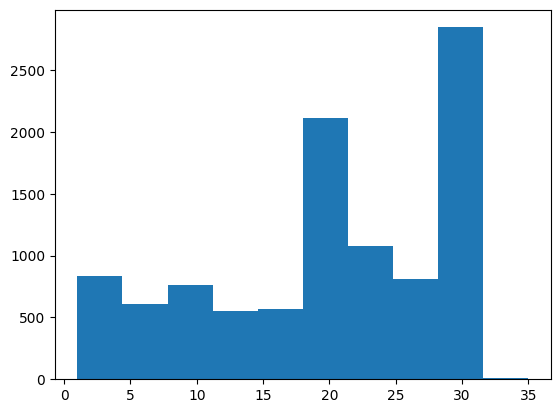

In [5]:
group_nums = identity_df.groupby(1)[0].nunique()

plt.hist(group_nums)

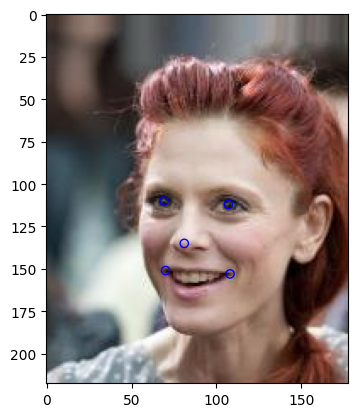

In [6]:
landmark = landmark_df.loc[1].tolist()

img_fn = landmark[0]
ld = np.array(landmark[1:])

img = cv2.imread(str(img_src_path / img_fn))


plt.imshow(img[..., ::-1])
plt.scatter(ld[::2], ld[1::2], facecolors='none', edgecolors='b')

In [7]:
from tqdm.notebook import trange 

dst_dir = Path('../datasets/celeba-recog-50/')
train_mapping_list = []
val_mapping_list = []

def lottery(p=0.8) -> bool:
    return np.random.rand() < p

for i in trange(1, 51):
    data = identity_df[0][identity_df[1] == i]
    for img_fn in data:
        to_train = lottery(0.8)
        train_val = 'train' if to_train else 'val'

        to_dst_dir = (dst_dir / train_val) / 'images'
        if not to_dst_dir.exists():
            to_dst_dir.mkdir(parents=True)

        dst_path = to_dst_dir / img_fn
        img_scr_path = img_src_path / img_fn
        shutil.copy(img_scr_path, dst_path)

        label = (img_fn, i-1)
        if to_train:
            train_mapping_list.append(label)
        else:
            val_mapping_list.append(label)

pd.DataFrame(train_mapping_list).to_csv((dst_dir / 'train') / 'mapping.csv', header=False, index=False)
pd.DataFrame(val_mapping_list).to_csv((dst_dir / 'val') / 'mapping.csv', header=False, index=False)
        

  0%|          | 0/50 [00:00<?, ?it/s]